---------------------------------------
Affichage données initiales            


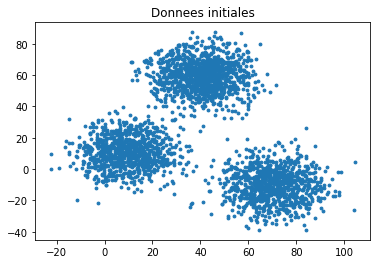

------------------------------------------------------
Appel KMeans pour une valeur de k fixée (données init)


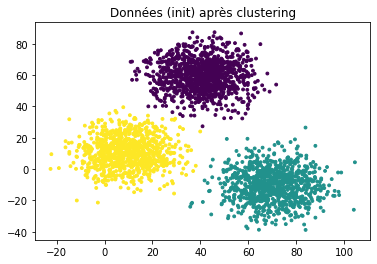

nb clusters = 3 , nb iter = 3 , runtime =  50.0 ms
Inertie :  611605.8806933893
Coefficient de silhouette :  0.6945587736089913


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

from scipy.io import arff
from sklearn import cluster
from sklearn import metrics

##################################################################
# READ a data set (arff format)

# Parser un fichier de données au format arff
# datanp est un tableau (numpy) d'exemples avec pour chacun la liste 
# des valeurs des features

# Note 1 : 
# dans les jeux de données considérés : 2 features (dimension 2 seulement)
# t =np.array([[1,2], [3,4], [5,6], [7,8]]) 
#
# Note 2 : 
# le jeu de données contient aussi un numéro de cluster pour chaque point
# --> IGNORER CETTE INFORMATION ....
#    2d-4c-no9.arff

path = './artificial/'
databrut = arff.loadarff(open(path+"xclara.arff", 'r'))
datanp = np.array([[x[0],x[1]] for x in databrut[0]])
#print(databrut)
#print(datanp)

##################################################################
# PLOT datanp (en 2D) - / scatter plot
# Extraire chaque valeur de features pour en faire une liste
# EX : 
# - pour t1=t[:,0] --> [1, 3, 5, 7]
# - pour t2=t[:,1] --> [2, 4, 6, 8]
print("---------------------------------------")
print("Affichage données initiales            ")
f0 = datanp[:,0] # tous les élements de la première colonne
f1 = datanp[:,1] # tous les éléments de la deuxième colonne

plt.scatter(f0, f1, s=8)
plt.title("Donnees initiales")
plt.show()

##################################################################
# Run clustering method for a given number of clusters
print("------------------------------------------------------")
print("Appel KMeans pour une valeur de k fixée (données init)")
tps1 = time.time()
k=3
model_km = cluster.KMeans(n_clusters=k, init='k-means++')
model_km.fit(datanp)
tps2 = time.time()
labels_km = model_km.labels_
# Nb iteration of this method
iteration = model_km.n_iter_

# Résultat du clustering
plt.scatter(f0, f1, c=labels_km, s=8)
plt.title("Données (init) après clustering")
plt.show()
print("nb clusters =",k,", nb iter =",iteration, ", runtime = ", round((tps2 - tps1)*1000,2),"ms")
#print("labels", labels_km)
# Some evaluation metrics
# inertie = wcss : within cluster sum of squares
inert = model_km.inertia_
silh = metrics.silhouette_score(datanp, model_km.labels_, metric='euclidean')
print("Inertie : ", inert)
print("Coefficient de silhouette : ", silh)

########################################################################
# TESTER PARAMETRES METHODE ET RECUPERER autres métriques
########################################################################